In [1]:
#Import library
import pandas as pd
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer 
import itertools
#import malaya
import string 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.naive_bayes import MultinomialNB
import re
import requests
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
#from cf_matrix import make_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
#IMPORT DATA KEDALAM SISTEM
def load_data():
    data = pd.read_excel('Sebenarnya_Data2.xlsx')#ubah nama file sesai dengan nama file kalian
    return data

In [3]:
#RETRIEVE DATA UNTUK SHOW DALAM SISTEM
df= load_data()

In [4]:
#SYNTAX UNTUK DISPLAY DATA
df.head() #PAMER 5 BARIS PERTAMA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   No.            1000 non-null   int64         
 1   Date           1000 non-null   datetime64[ns]
 2   Title          1000 non-null   object        
 3   Content        1000 non-null   object        
 4   Domain/Issues  1000 non-null   object        
 5   URL            996 non-null    object        
 6   Label          994 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 54.8+ KB


In [17]:
df

,No.,Date,Title,Content,Domain/Issues,URL,Label
0,831,2002-04-24,Borang Permohonan Bantuan Ihsan COVID-19 Neger...,Menurut Pejabat Setiausaha Kerajaan Johor mela...,National : Urus tadbir,https://www.facebook.com/999730380072690/posts...,Palsu
1,1,2018-07-24,Kementerian Kesihatan Mengeluarkan Arahan Menu...,Tular di media sosial dakwaan terhadap Kemente...,Social :Kesihatan,https://www.astroawani.com/berita-malaysia/bel...,Palsu
2,2,2018-07-24,Waspada Jangkitan Virus HFMD Di Pusat Beli Bel...,Orang ramai adalah dinasihatkan supaya berhati...,Social :Kesihatan,https://www.astroawani.com/berita-malaysia/hfm...,Waspada
3,3,2018-07-25,Terdapat Serangan Obor-Obor Merah Di Perairan ...,Hangat diperkatakan di media sosial dakwaan ba...,National : Bencana,https://www.facebook.com/taman.johor/posts/161...,Palsu
4,4,2018-07-26,Kawad “Goose Step” ATM Ikut Gaya Tentera Komunis?,Angkatan Tentera Malaysia (ATM) menjelaskan da...,National : Keselamatan,https://www.hmetro.com.my/mutakhir/2018/07/362...,Penjelasan
...,...,...,...,...,...,...,...
995,996,2020-10-08,Dakwaan 13 Menteri Kabinet Positif COVID-19 Ad...,Dakwaan mengenai 13 Menteri Kabinet didapati p...,Social : Kesihatan,https://t.me/MKNRasmi/4237,Palsu
996,997,2020-10-08,Waspada Panggilan Telefon Kononnya Daripada Pi...,Menurut Telekom Malaysia (TM):\n\nHati-hati ji...,Social : Kepenggunaan,https://www.facebook.com/myTMgroup/posts/62303...,Waspada
997,998,2020-10-09,Aktiviti Banci Secara Bersemuka Masih Berjalan...,Menurut kenyataan Jabatan Perangkaan Malaysia ...,National : Urus tadbir,https://www.facebook.com/mycensus2020/photos/a...,Palsu
998,999,2020-10-10,Waspada E-mel Atau Mesej Yang Menggunakan Nama...,Menurut kenyataan media Suruhanjaya Komunikasi...,Social : Kepenggunaan,https://www.facebook.com/SuruhanjayaKomunikasi...,Palsu


In [18]:
#DATA MASUK KEDALAM ARRAY DAN PILIH CONTENT DAN TITLE SAHAJA UNTUK DI PAMERKAN
df  = pd.DataFrame(df[['Content','Title','Label']])
df

,Content,Title,Label
0,Menurut Pejabat Setiausaha Kerajaan Johor mela...,Borang Permohonan Bantuan Ihsan COVID-19 Neger...,Palsu
1,Tular di media sosial dakwaan terhadap Kemente...,Kementerian Kesihatan Mengeluarkan Arahan Menu...,Palsu
2,Orang ramai adalah dinasihatkan supaya berhati...,Waspada Jangkitan Virus HFMD Di Pusat Beli Bel...,Waspada
3,Hangat diperkatakan di media sosial dakwaan ba...,Terdapat Serangan Obor-Obor Merah Di Perairan ...,Palsu
4,Angkatan Tentera Malaysia (ATM) menjelaskan da...,Kawad “Goose Step” ATM Ikut Gaya Tentera Komunis?,Penjelasan
...,...,...,...
995,Dakwaan mengenai 13 Menteri Kabinet didapati p...,Dakwaan 13 Menteri Kabinet Positif COVID-19 Ad...,Palsu
996,Menurut Telekom Malaysia (TM):\n\nHati-hati ji...,Waspada Panggilan Telefon Kononnya Daripada Pi...,Waspada
997,Menurut kenyataan Jabatan Perangkaan Malaysia ...,Aktiviti Banci Secara Bersemuka Masih Berjalan...,Palsu
998,Menurut kenyataan media Suruhanjaya Komunikasi...,Waspada E-mel Atau Mesej Yang Menggunakan Nama...,Palsu


# RegEx Module

A RegEx, or Regular Expression, is a sequence of characters that forms a search pattern.

RegEx can be used to check if a string contains the specified search pattern.

Python has a built-in package called re, which can be used to work with Regular Expressions.

Import the re module:

In [19]:

def remove_pattern(news, pattern):
    r = re.findall(pattern, news)
    for i in r:
        news = re.sub(i, '', news)
    return news    
df['remove_user'] = np.vectorize(remove_pattern)(df['Content'], "@[\w]*")


In [20]:
df

,Content,Title,Label,remove_user
0,Menurut Pejabat Setiausaha Kerajaan Johor mela...,Borang Permohonan Bantuan Ihsan COVID-19 Neger...,Palsu,Menurut Pejabat Setiausaha Kerajaan Johor mela...
1,Tular di media sosial dakwaan terhadap Kemente...,Kementerian Kesihatan Mengeluarkan Arahan Menu...,Palsu,Tular di media sosial dakwaan terhadap Kemente...
2,Orang ramai adalah dinasihatkan supaya berhati...,Waspada Jangkitan Virus HFMD Di Pusat Beli Bel...,Waspada,Orang ramai adalah dinasihatkan supaya berhati...
3,Hangat diperkatakan di media sosial dakwaan ba...,Terdapat Serangan Obor-Obor Merah Di Perairan ...,Palsu,Hangat diperkatakan di media sosial dakwaan ba...
4,Angkatan Tentera Malaysia (ATM) menjelaskan da...,Kawad “Goose Step” ATM Ikut Gaya Tentera Komunis?,Penjelasan,Angkatan Tentera Malaysia (ATM) menjelaskan da...
...,...,...,...,...
995,Dakwaan mengenai 13 Menteri Kabinet didapati p...,Dakwaan 13 Menteri Kabinet Positif COVID-19 Ad...,Palsu,Dakwaan mengenai 13 Menteri Kabinet didapati p...
996,Menurut Telekom Malaysia (TM):\n\nHati-hati ji...,Waspada Panggilan Telefon Kononnya Daripada Pi...,Waspada,Menurut Telekom Malaysia (TM):\n\nHati-hati ji...
997,Menurut kenyataan Jabatan Perangkaan Malaysia ...,Aktiviti Banci Secara Bersemuka Masih Berjalan...,Palsu,Menurut kenyataan Jabatan Perangkaan Malaysia ...
998,Menurut kenyataan media Suruhanjaya Komunikasi...,Waspada E-mel Atau Mesej Yang Menggunakan Nama...,Palsu,Menurut kenyataan media Suruhanjaya Komunikasi...


In [21]:
#Untuk data twitter( Jika ada user), so untuk remove user /@
def remove_pattern(news, pattern):
    r = re.findall(pattern, news)
    for i in r:
        news = re.sub(i, '', news)
    return news    
df['cleanTitle'] = np.vectorize(remove_pattern)(df['Title'], "@[\w]*")

In [22]:
df

,Content,Title,Label,remove_user,cleanTitle
0,Menurut Pejabat Setiausaha Kerajaan Johor mela...,Borang Permohonan Bantuan Ihsan COVID-19 Neger...,Palsu,Menurut Pejabat Setiausaha Kerajaan Johor mela...,Borang Permohonan Bantuan Ihsan COVID-19 Neger...
1,Tular di media sosial dakwaan terhadap Kemente...,Kementerian Kesihatan Mengeluarkan Arahan Menu...,Palsu,Tular di media sosial dakwaan terhadap Kemente...,Kementerian Kesihatan Mengeluarkan Arahan Menu...
2,Orang ramai adalah dinasihatkan supaya berhati...,Waspada Jangkitan Virus HFMD Di Pusat Beli Bel...,Waspada,Orang ramai adalah dinasihatkan supaya berhati...,Waspada Jangkitan Virus HFMD Di Pusat Beli Bel...
3,Hangat diperkatakan di media sosial dakwaan ba...,Terdapat Serangan Obor-Obor Merah Di Perairan ...,Palsu,Hangat diperkatakan di media sosial dakwaan ba...,Terdapat Serangan Obor-Obor Merah Di Perairan ...
4,Angkatan Tentera Malaysia (ATM) menjelaskan da...,Kawad “Goose Step” ATM Ikut Gaya Tentera Komunis?,Penjelasan,Angkatan Tentera Malaysia (ATM) menjelaskan da...,Kawad “Goose Step” ATM Ikut Gaya Tentera Komunis?
...,...,...,...,...,...
995,Dakwaan mengenai 13 Menteri Kabinet didapati p...,Dakwaan 13 Menteri Kabinet Positif COVID-19 Ad...,Palsu,Dakwaan mengenai 13 Menteri Kabinet didapati p...,Dakwaan 13 Menteri Kabinet Positif COVID-19 Ad...
996,Menurut Telekom Malaysia (TM):\n\nHati-hati ji...,Waspada Panggilan Telefon Kononnya Daripada Pi...,Waspada,Menurut Telekom Malaysia (TM):\n\nHati-hati ji...,Waspada Panggilan Telefon Kononnya Daripada Pi...
997,Menurut kenyataan Jabatan Perangkaan Malaysia ...,Aktiviti Banci Secara Bersemuka Masih Berjalan...,Palsu,Menurut kenyataan Jabatan Perangkaan Malaysia ...,Aktiviti Banci Secara Bersemuka Masih Berjalan...
998,Menurut kenyataan media Suruhanjaya Komunikasi...,Waspada E-mel Atau Mesej Yang Menggunakan Nama...,Palsu,Menurut kenyataan media Suruhanjaya Komunikasi...,Waspada E-mel Atau Mesej Yang Menggunakan Nama...


In [23]:
#buang column yg tak diperlukan
df.drop(['Content','Title'], inplace=True, axis=1)

In [24]:
df

,Label,remove_user,cleanTitle
0,Palsu,Menurut Pejabat Setiausaha Kerajaan Johor mela...,Borang Permohonan Bantuan Ihsan COVID-19 Neger...
1,Palsu,Tular di media sosial dakwaan terhadap Kemente...,Kementerian Kesihatan Mengeluarkan Arahan Menu...
2,Waspada,Orang ramai adalah dinasihatkan supaya berhati...,Waspada Jangkitan Virus HFMD Di Pusat Beli Bel...
3,Palsu,Hangat diperkatakan di media sosial dakwaan ba...,Terdapat Serangan Obor-Obor Merah Di Perairan ...
4,Penjelasan,Angkatan Tentera Malaysia (ATM) menjelaskan da...,Kawad “Goose Step” ATM Ikut Gaya Tentera Komunis?
...,...,...,...
995,Palsu,Dakwaan mengenai 13 Menteri Kabinet didapati p...,Dakwaan 13 Menteri Kabinet Positif COVID-19 Ad...
996,Waspada,Menurut Telekom Malaysia (TM):\n\nHati-hati ji...,Waspada Panggilan Telefon Kononnya Daripada Pi...
997,Palsu,Menurut kenyataan Jabatan Perangkaan Malaysia ...,Aktiviti Banci Secara Bersemuka Masih Berjalan...
998,Palsu,Menurut kenyataan media Suruhanjaya Komunikasi...,Waspada E-mel Atau Mesej Yang Menggunakan Nama...


In [25]:
def remove(news):
    #remove angka
    news = re.sub('[0-9]+', '', news)
    
    # remove stock market tickers like $GE
    news = re.sub(r'\$\w*', '', news)
 
    # remove old style retweet text "RT"
    news = re.sub(r'^RT[\s]+', '', news)
    
    # remove hashtags
    # only removing the hash # sign from the word
    news = re.sub(r'#', '', news)
    return news

In [26]:
df['cleanTitle2'] = df['cleanTitle'].apply(lambda x: remove(x))
df['cleanContent2'] = df['remove_user'].apply(lambda x: remove(x))
#df.sort_values("cleanTitle", inplace = True)

#buang data yg dulicate
#df.drop_duplicates(subset ="remove_user", keep = 'first', inplace = True)

In [27]:
df

,Label,remove_user,cleanTitle,cleanTitle2,cleanContent2
0,Palsu,Menurut Pejabat Setiausaha Kerajaan Johor mela...,Borang Permohonan Bantuan Ihsan COVID-19 Neger...,Borang Permohonan Bantuan Ihsan COVID- Negeri ...,Menurut Pejabat Setiausaha Kerajaan Johor mela...
1,Palsu,Tular di media sosial dakwaan terhadap Kemente...,Kementerian Kesihatan Mengeluarkan Arahan Menu...,Kementerian Kesihatan Mengeluarkan Arahan Menu...,Tular di media sosial dakwaan terhadap Kemente...
2,Waspada,Orang ramai adalah dinasihatkan supaya berhati...,Waspada Jangkitan Virus HFMD Di Pusat Beli Bel...,Waspada Jangkitan Virus HFMD Di Pusat Beli Bel...,Orang ramai adalah dinasihatkan supaya berhati...
3,Palsu,Hangat diperkatakan di media sosial dakwaan ba...,Terdapat Serangan Obor-Obor Merah Di Perairan ...,Terdapat Serangan Obor-Obor Merah Di Perairan ...,Hangat diperkatakan di media sosial dakwaan ba...
4,Penjelasan,Angkatan Tentera Malaysia (ATM) menjelaskan da...,Kawad “Goose Step” ATM Ikut Gaya Tentera Komunis?,Kawad “Goose Step” ATM Ikut Gaya Tentera Komunis?,Angkatan Tentera Malaysia (ATM) menjelaskan da...
...,...,...,...,...,...
995,Palsu,Dakwaan mengenai 13 Menteri Kabinet didapati p...,Dakwaan 13 Menteri Kabinet Positif COVID-19 Ad...,Dakwaan Menteri Kabinet Positif COVID- Adalah...,Dakwaan mengenai Menteri Kabinet didapati pos...
996,Waspada,Menurut Telekom Malaysia (TM):\n\nHati-hati ji...,Waspada Panggilan Telefon Kononnya Daripada Pi...,Waspada Panggilan Telefon Kononnya Daripada Pi...,Menurut Telekom Malaysia (TM):\n\nHati-hati ji...
997,Palsu,Menurut kenyataan Jabatan Perangkaan Malaysia ...,Aktiviti Banci Secara Bersemuka Masih Berjalan...,Aktiviti Banci Secara Bersemuka Masih Berjalan...,Menurut kenyataan Jabatan Perangkaan Malaysia ...
998,Palsu,Menurut kenyataan media Suruhanjaya Komunikasi...,Waspada E-mel Atau Mesej Yang Menggunakan Nama...,Waspada E-mel Atau Mesej Yang Menggunakan Nama...,Menurut kenyataan media Suruhanjaya Komunikasi...


In [28]:
#buang column yg tak diperlukan
df.drop('remove_user', inplace=True, axis=1)
#df.drop(df.columns[[1, 2, 3,4]], axis = 1, inplace = True)


In [29]:
df

,Label,cleanTitle,cleanTitle2,cleanContent2
0,Palsu,Borang Permohonan Bantuan Ihsan COVID-19 Neger...,Borang Permohonan Bantuan Ihsan COVID- Negeri ...,Menurut Pejabat Setiausaha Kerajaan Johor mela...
1,Palsu,Kementerian Kesihatan Mengeluarkan Arahan Menu...,Kementerian Kesihatan Mengeluarkan Arahan Menu...,Tular di media sosial dakwaan terhadap Kemente...
2,Waspada,Waspada Jangkitan Virus HFMD Di Pusat Beli Bel...,Waspada Jangkitan Virus HFMD Di Pusat Beli Bel...,Orang ramai adalah dinasihatkan supaya berhati...
3,Palsu,Terdapat Serangan Obor-Obor Merah Di Perairan ...,Terdapat Serangan Obor-Obor Merah Di Perairan ...,Hangat diperkatakan di media sosial dakwaan ba...
4,Penjelasan,Kawad “Goose Step” ATM Ikut Gaya Tentera Komunis?,Kawad “Goose Step” ATM Ikut Gaya Tentera Komunis?,Angkatan Tentera Malaysia (ATM) menjelaskan da...
...,...,...,...,...
995,Palsu,Dakwaan 13 Menteri Kabinet Positif COVID-19 Ad...,Dakwaan Menteri Kabinet Positif COVID- Adalah...,Dakwaan mengenai Menteri Kabinet didapati pos...
996,Waspada,Waspada Panggilan Telefon Kononnya Daripada Pi...,Waspada Panggilan Telefon Kononnya Daripada Pi...,Menurut Telekom Malaysia (TM):\n\nHati-hati ji...
997,Palsu,Aktiviti Banci Secara Bersemuka Masih Berjalan...,Aktiviti Banci Secara Bersemuka Masih Berjalan...,Menurut kenyataan Jabatan Perangkaan Malaysia ...
998,Palsu,Waspada E-mel Atau Mesej Yang Menggunakan Nama...,Waspada E-mel Atau Mesej Yang Menggunakan Nama...,Menurut kenyataan media Suruhanjaya Komunikasi...


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Label          994 non-null    object
 1   cleanTitle     1000 non-null   object
 2   cleanTitle2    1000 non-null   object
 3   cleanContent2  1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB


In [31]:
df

,Label,cleanTitle,cleanTitle2,cleanContent2
0,Palsu,Borang Permohonan Bantuan Ihsan COVID-19 Neger...,Borang Permohonan Bantuan Ihsan COVID- Negeri ...,Menurut Pejabat Setiausaha Kerajaan Johor mela...
1,Palsu,Kementerian Kesihatan Mengeluarkan Arahan Menu...,Kementerian Kesihatan Mengeluarkan Arahan Menu...,Tular di media sosial dakwaan terhadap Kemente...
2,Waspada,Waspada Jangkitan Virus HFMD Di Pusat Beli Bel...,Waspada Jangkitan Virus HFMD Di Pusat Beli Bel...,Orang ramai adalah dinasihatkan supaya berhati...
3,Palsu,Terdapat Serangan Obor-Obor Merah Di Perairan ...,Terdapat Serangan Obor-Obor Merah Di Perairan ...,Hangat diperkatakan di media sosial dakwaan ba...
4,Penjelasan,Kawad “Goose Step” ATM Ikut Gaya Tentera Komunis?,Kawad “Goose Step” ATM Ikut Gaya Tentera Komunis?,Angkatan Tentera Malaysia (ATM) menjelaskan da...
...,...,...,...,...
995,Palsu,Dakwaan 13 Menteri Kabinet Positif COVID-19 Ad...,Dakwaan Menteri Kabinet Positif COVID- Adalah...,Dakwaan mengenai Menteri Kabinet didapati pos...
996,Waspada,Waspada Panggilan Telefon Kononnya Daripada Pi...,Waspada Panggilan Telefon Kononnya Daripada Pi...,Menurut Telekom Malaysia (TM):\n\nHati-hati ji...
997,Palsu,Aktiviti Banci Secara Bersemuka Masih Berjalan...,Aktiviti Banci Secara Bersemuka Masih Berjalan...,Menurut kenyataan Jabatan Perangkaan Malaysia ...
998,Palsu,Waspada E-mel Atau Mesej Yang Menggunakan Nama...,Waspada E-mel Atau Mesej Yang Menggunakan Nama...,Menurut kenyataan media Suruhanjaya Komunikasi...


In [32]:
#import stopword
from nltk.corpus import stopwords 
#indo = stopwords.words('indonesian')
#add words that aren't in the NLTK stopwords list
from nltk.corpus import stopwords
indo = nltk.corpus.stopwords.words('indonesian')
indo.append(['amat','antara','apa','apabila','as','atas','atau','bagaimanapun','bahawa','baru-baru','bawah','bermula','bhd','bn','boleh','dalam','dan','dana','dapat','dari','daripada','dasar','datang','demikian','dengan','depan','derivatives','di','dis','disember','empat','enam'])
indo.append(['feb','hadapan','hanya','ia','iaitu','ialah','ini','isnin','itu','jika','juga','julai','jumaat','jun','kali','kami','kata','katanya','ke','kecil','kedua','kedua-dua','kedudukan','kekal','kepada','kerana','ketika','khamis','kini','kira-kira','kita','lagi'])

#print(new_indo)

#import sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#tokenize
from nltk.tokenize import TweetTokenizer

#from pprint import pprint

# Remove any emoticons
# Happy Emoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])
 
# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])
 
# all emoticons (happy + sad)
emoticons = emoticons_happy.union(emoticons_sad)

#from pprint import pprint

def clean_news(news):
    # remove stock market tickers like $GE
    news = re.sub(r'\$\w*', '', news)
 
    # remove old style retweet text "RT"
    news = re.sub(r'^RT[\s]+', '', news)
 
    # remove hyperlinks
    news = re.sub(r'https?:\/\/.*[\r\n]*', '', news)
    
    # remove hashtags
    # only removing the hash # sign from the word
    news = re.sub(r'#', '', news)
    
    #remove coma
    news = re.sub(r',','',news)
    
    #remove angka
    news = re.sub('[0-9]+', '', news)
    
    #Tokenize statement using tweet tokenizer
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tokenizeNews = tokenizer.tokenize(news)
    
    news_clean = []
    for word in tokenizeNews:
        if(word not in indo and word not in emoticons and 
           word not in string.punctuation):
            stem_word = stemmer.stem(word)
            news_clean.append(stem_word)
            
    return news_clean
        
    
    #true case
    #news = malaya.true_case.transformer()
    #Spelling correction
    #news = malaya.spell.symspell()
    #news_corrector =symspell_corrector.correct(news)
    #import stopword
    # Tokenize and stemming
    #news = malaya.preprocessing.TOKENIZER(preserve_case=False, strip_handles=True, reduce_len=True)
    #news_tokens = tokenizer.tokenize(news)
    
  
    
    
    
    
    
    

In [33]:
 df['remove_noice_Content'] = df['cleanContent2'].apply(lambda x: clean_news(x))

In [34]:
df['remove_noice_Title'] = df['cleanTitle2'].apply(lambda x: clean_news(x))

In [35]:
df

,Label,cleanTitle,cleanTitle2,cleanContent2,remove_noice_Content,remove_noice_Title
0,Palsu,Borang Permohonan Bantuan Ihsan COVID-19 Neger...,Borang Permohonan Bantuan Ihsan COVID- Negeri ...,Menurut Pejabat Setiausaha Kerajaan Johor mela...,"[setiausaha, raja, johor, facebook, rasminya, ...","[borang, mohon, bantu, ihsan, covid, negeri, j..."
1,Palsu,Kementerian Kesihatan Mengeluarkan Arahan Menu...,Kementerian Kesihatan Mengeluarkan Arahan Menu...,Tular di media sosial dakwaan terhadap Kemente...,"[tular, media, sosial, dakwa, menteri, kesihat...","[menteri, kesihatan, keluar, arah, tutup, klin..."
2,Waspada,Waspada Jangkitan Virus HFMD Di Pusat Beli Bel...,Waspada Jangkitan Virus HFMD Di Pusat Beli Bel...,Orang ramai adalah dinasihatkan supaya berhati...,"[orang, ramai, nasihat, hati, sebar, virus, sa...","[waspada, jangkit, virus, hfmd, pusat, beli, b..."
3,Palsu,Terdapat Serangan Obor-Obor Merah Di Perairan ...,Terdapat Serangan Obor-Obor Merah Di Perairan ...,Hangat diperkatakan di media sosial dakwaan ba...,"[hangat, kata, media, sosial, dakwa, bahawa, l...","[serang, obor, merah, air, johor]"
4,Penjelasan,Kawad “Goose Step” ATM Ikut Gaya Tentera Komunis?,Kawad “Goose Step” ATM Ikut Gaya Tentera Komunis?,Angkatan Tentera Malaysia (ATM) menjelaskan da...,"[angkat, tentera, malaysia, atm, dakwa, konon,...","[kawad, , goose, step, , atm, gaya, tentera, k..."
...,...,...,...,...,...,...
995,Palsu,Dakwaan 13 Menteri Kabinet Positif COVID-19 Ad...,Dakwaan Menteri Kabinet Positif COVID- Adalah...,Dakwaan mengenai Menteri Kabinet didapati pos...,"[dakwa, menteri, kabinet, dapat, positif, covi...","[dakwa, menteri, kabinet, positif, covid]"
996,Waspada,Waspada Panggilan Telefon Kononnya Daripada Pi...,Waspada Panggilan Telefon Kononnya Daripada Pi...,Menurut Telekom Malaysia (TM):\n\nHati-hati ji...,"[telekom, malaysia, tm, , hati, terima, panggi...","[waspada, panggil, telefon, konon, tm, dakwa, ..."
997,Palsu,Aktiviti Banci Secara Bersemuka Masih Berjalan...,Aktiviti Banci Secara Bersemuka Masih Berjalan...,Menurut kenyataan Jabatan Perangkaan Malaysia ...,"[nyata, jabat, angka, malaysia, dosm, , jabat,...","[aktiviti, banci, muka, jalan]"
998,Palsu,Waspada E-mel Atau Mesej Yang Menggunakan Nama...,Waspada E-mel Atau Mesej Yang Menggunakan Nama...,Menurut kenyataan media Suruhanjaya Komunikasi...,"[nyata, media, suruhanjaya, komunikasi, multim...","[waspada, e-mel, mesej, nama, mcmc, tuntut, ha..."


In [36]:
df.drop('cleanContent2', inplace=True, axis=1)
df.drop('cleanTitle2', inplace=True, axis=1)
df

,Label,cleanTitle,remove_noice_Content,remove_noice_Title
0,Palsu,Borang Permohonan Bantuan Ihsan COVID-19 Neger...,"[setiausaha, raja, johor, facebook, rasminya, ...","[borang, mohon, bantu, ihsan, covid, negeri, j..."
1,Palsu,Kementerian Kesihatan Mengeluarkan Arahan Menu...,"[tular, media, sosial, dakwa, menteri, kesihat...","[menteri, kesihatan, keluar, arah, tutup, klin..."
2,Waspada,Waspada Jangkitan Virus HFMD Di Pusat Beli Bel...,"[orang, ramai, nasihat, hati, sebar, virus, sa...","[waspada, jangkit, virus, hfmd, pusat, beli, b..."
3,Palsu,Terdapat Serangan Obor-Obor Merah Di Perairan ...,"[hangat, kata, media, sosial, dakwa, bahawa, l...","[serang, obor, merah, air, johor]"
4,Penjelasan,Kawad “Goose Step” ATM Ikut Gaya Tentera Komunis?,"[angkat, tentera, malaysia, atm, dakwa, konon,...","[kawad, , goose, step, , atm, gaya, tentera, k..."
...,...,...,...,...
995,Palsu,Dakwaan 13 Menteri Kabinet Positif COVID-19 Ad...,"[dakwa, menteri, kabinet, dapat, positif, covi...","[dakwa, menteri, kabinet, positif, covid]"
996,Waspada,Waspada Panggilan Telefon Kononnya Daripada Pi...,"[telekom, malaysia, tm, , hati, terima, panggi...","[waspada, panggil, telefon, konon, tm, dakwa, ..."
997,Palsu,Aktiviti Banci Secara Bersemuka Masih Berjalan...,"[nyata, jabat, angka, malaysia, dosm, , jabat,...","[aktiviti, banci, muka, jalan]"
998,Palsu,Waspada E-mel Atau Mesej Yang Menggunakan Nama...,"[nyata, media, suruhanjaya, komunikasi, multim...","[waspada, e-mel, mesej, nama, mcmc, tuntut, ha..."


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Label                 994 non-null    object
 1   cleanTitle            1000 non-null   object
 2   remove_noice_Content  1000 non-null   object
 3   remove_noice_Title    1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB


In [38]:
df

,Label,cleanTitle,remove_noice_Content,remove_noice_Title
0,Palsu,Borang Permohonan Bantuan Ihsan COVID-19 Neger...,"[setiausaha, raja, johor, facebook, rasminya, ...","[borang, mohon, bantu, ihsan, covid, negeri, j..."
1,Palsu,Kementerian Kesihatan Mengeluarkan Arahan Menu...,"[tular, media, sosial, dakwa, menteri, kesihat...","[menteri, kesihatan, keluar, arah, tutup, klin..."
2,Waspada,Waspada Jangkitan Virus HFMD Di Pusat Beli Bel...,"[orang, ramai, nasihat, hati, sebar, virus, sa...","[waspada, jangkit, virus, hfmd, pusat, beli, b..."
3,Palsu,Terdapat Serangan Obor-Obor Merah Di Perairan ...,"[hangat, kata, media, sosial, dakwa, bahawa, l...","[serang, obor, merah, air, johor]"
4,Penjelasan,Kawad “Goose Step” ATM Ikut Gaya Tentera Komunis?,"[angkat, tentera, malaysia, atm, dakwa, konon,...","[kawad, , goose, step, , atm, gaya, tentera, k..."
...,...,...,...,...
995,Palsu,Dakwaan 13 Menteri Kabinet Positif COVID-19 Ad...,"[dakwa, menteri, kabinet, dapat, positif, covi...","[dakwa, menteri, kabinet, positif, covid]"
996,Waspada,Waspada Panggilan Telefon Kononnya Daripada Pi...,"[telekom, malaysia, tm, , hati, terima, panggi...","[waspada, panggil, telefon, konon, tm, dakwa, ..."
997,Palsu,Aktiviti Banci Secara Bersemuka Masih Berjalan...,"[nyata, jabat, angka, malaysia, dosm, , jabat,...","[aktiviti, banci, muka, jalan]"
998,Palsu,Waspada E-mel Atau Mesej Yang Menggunakan Nama...,"[nyata, media, suruhanjaya, komunikasi, multim...","[waspada, e-mel, mesej, nama, mcmc, tuntut, ha..."


In [39]:
def lemmatize(text):
    word_net = WordNetLemmatizer()
    return [word_net.lemmatize(word) for word in text]

In [40]:
df['Content'] = df['remove_noice_Content'].apply(lambda x : lemmatize(x))
df['Title'] = df['remove_noice_Title'].apply(lambda x : lemmatize(x))
df.head()

,Label,cleanTitle,remove_noice_Content,remove_noice_Title,Content,Title
0,Palsu,Borang Permohonan Bantuan Ihsan COVID-19 Neger...,"[setiausaha, raja, johor, facebook, rasminya, ...","[borang, mohon, bantu, ihsan, covid, negeri, j...","[setiausaha, raja, johor, facebook, rasminya, ...","[borang, mohon, bantu, ihsan, covid, negeri, j..."
1,Palsu,Kementerian Kesihatan Mengeluarkan Arahan Menu...,"[tular, media, sosial, dakwa, menteri, kesihat...","[menteri, kesihatan, keluar, arah, tutup, klin...","[tular, medium, sosial, dakwa, menteri, kesiha...","[menteri, kesihatan, keluar, arah, tutup, klin..."
2,Waspada,Waspada Jangkitan Virus HFMD Di Pusat Beli Bel...,"[orang, ramai, nasihat, hati, sebar, virus, sa...","[waspada, jangkit, virus, hfmd, pusat, beli, b...","[orang, ramai, nasihat, hati, sebar, virus, sa...","[waspada, jangkit, virus, hfmd, pusat, beli, b..."
3,Palsu,Terdapat Serangan Obor-Obor Merah Di Perairan ...,"[hangat, kata, media, sosial, dakwa, bahawa, l...","[serang, obor, merah, air, johor]","[hangat, kata, medium, sosial, dakwa, bahawa, ...","[serang, obor, merah, air, johor]"
4,Penjelasan,Kawad “Goose Step” ATM Ikut Gaya Tentera Komunis?,"[angkat, tentera, malaysia, atm, dakwa, konon,...","[kawad, , goose, step, , atm, gaya, tentera, k...","[angkat, tentera, malaysia, atm, dakwa, konon,...","[kawad, , goose, step, , atm, gaya, tentera, k..."


In [41]:
df.drop('remove_noice_Content', inplace=True, axis=1)
df.drop('remove_noice_Title', inplace=True, axis=1)
df

,Label,cleanTitle,Content,Title
0,Palsu,Borang Permohonan Bantuan Ihsan COVID-19 Neger...,"[setiausaha, raja, johor, facebook, rasminya, ...","[borang, mohon, bantu, ihsan, covid, negeri, j..."
1,Palsu,Kementerian Kesihatan Mengeluarkan Arahan Menu...,"[tular, medium, sosial, dakwa, menteri, kesiha...","[menteri, kesihatan, keluar, arah, tutup, klin..."
2,Waspada,Waspada Jangkitan Virus HFMD Di Pusat Beli Bel...,"[orang, ramai, nasihat, hati, sebar, virus, sa...","[waspada, jangkit, virus, hfmd, pusat, beli, b..."
3,Palsu,Terdapat Serangan Obor-Obor Merah Di Perairan ...,"[hangat, kata, medium, sosial, dakwa, bahawa, ...","[serang, obor, merah, air, johor]"
4,Penjelasan,Kawad “Goose Step” ATM Ikut Gaya Tentera Komunis?,"[angkat, tentera, malaysia, atm, dakwa, konon,...","[kawad, , goose, step, , atm, gaya, tentera, k..."
...,...,...,...,...
995,Palsu,Dakwaan 13 Menteri Kabinet Positif COVID-19 Ad...,"[dakwa, menteri, kabinet, dapat, positif, covi...","[dakwa, menteri, kabinet, positif, covid]"
996,Waspada,Waspada Panggilan Telefon Kononnya Daripada Pi...,"[telekom, malaysia, tm, , hati, terima, panggi...","[waspada, panggil, telefon, konon, tm, dakwa, ..."
997,Palsu,Aktiviti Banci Secara Bersemuka Masih Berjalan...,"[nyata, jabat, angka, malaysia, dosm, , jabat,...","[aktiviti, banci, muka, jalan]"
998,Palsu,Waspada E-mel Atau Mesej Yang Menggunakan Nama...,"[nyata, medium, suruhanjaya, komunikasi, multi...","[waspada, e-mel, mesej, nama, mcmc, tuntut, ha..."


In [42]:
#gabungkan ayat yg diproses kepada 1 perkataan
def remove_punt(news):
    news = " ".join([char for char in news if char not in string.punctuation])
    return news


In [43]:
df['Contents'] = df['Content'].apply(lambda x: remove_punt(x))
df['Titles'] = df['Title'].apply(lambda x: remove_punt(x))

In [44]:
df

,Label,cleanTitle,Content,Title,Contents,Titles
0,Palsu,Borang Permohonan Bantuan Ihsan COVID-19 Neger...,"[setiausaha, raja, johor, facebook, rasminya, ...","[borang, mohon, bantu, ihsan, covid, negeri, j...",setiausaha raja johor facebook rasminya bantu ...,borang mohon bantu ihsan covid negeri johor tu...
1,Palsu,Kementerian Kesihatan Mengeluarkan Arahan Menu...,"[tular, medium, sosial, dakwa, menteri, kesiha...","[menteri, kesihatan, keluar, arah, tutup, klin...",tular medium sosial dakwa menteri kesihatan ar...,menteri kesihatan keluar arah tutup klinik mal...
2,Waspada,Waspada Jangkitan Virus HFMD Di Pusat Beli Bel...,"[orang, ramai, nasihat, hati, sebar, virus, sa...","[waspada, jangkit, virus, hfmd, pusat, beli, b...",orang ramai nasihat hati sebar virus sakit tan...,waspada jangkit virus hfmd pusat beli belah pa...
3,Palsu,Terdapat Serangan Obor-Obor Merah Di Perairan ...,"[hangat, kata, medium, sosial, dakwa, bahawa, ...","[serang, obor, merah, air, johor]",hangat kata medium sosial dakwa bahawa laku se...,serang obor merah air johor
4,Penjelasan,Kawad “Goose Step” ATM Ikut Gaya Tentera Komunis?,"[angkat, tentera, malaysia, atm, dakwa, konon,...","[kawad, , goose, step, , atm, gaya, tentera, k...",angkat tentera malaysia atm dakwa konon latih ...,kawad goose step atm gaya tentera komunis
...,...,...,...,...,...,...
995,Palsu,Dakwaan 13 Menteri Kabinet Positif COVID-19 Ad...,"[dakwa, menteri, kabinet, dapat, positif, covi...","[dakwa, menteri, kabinet, positif, covid]",dakwa menteri kabinet dapat positif covid beri...,dakwa menteri kabinet positif covid
996,Waspada,Waspada Panggilan Telefon Kononnya Daripada Pi...,"[telekom, malaysia, tm, , hati, terima, panggi...","[waspada, panggil, telefon, konon, tm, dakwa, ...",telekom malaysia tm hati terima panggil konon ...,waspada panggil telefon konon tm dakwa talus t...
997,Palsu,Aktiviti Banci Secara Bersemuka Masih Berjalan...,"[nyata, jabat, angka, malaysia, dosm, , jabat,...","[aktiviti, banci, muka, jalan]",nyata jabat angka malaysia dosm jabat angka ma...,aktiviti banci muka jalan
998,Palsu,Waspada E-mel Atau Mesej Yang Menggunakan Nama...,"[nyata, medium, suruhanjaya, komunikasi, multi...","[waspada, e-mel, mesej, nama, mcmc, tuntut, ha...",nyata medium suruhanjaya komunikasi multimedia...,waspada e-mel mesej nama mcmc tuntut hadiah ko...


In [45]:
df.drop('Content', inplace=True, axis=1)
df.drop('Title', inplace=True, axis=1)
df

,Label,cleanTitle,Contents,Titles
0,Palsu,Borang Permohonan Bantuan Ihsan COVID-19 Neger...,setiausaha raja johor facebook rasminya bantu ...,borang mohon bantu ihsan covid negeri johor tu...
1,Palsu,Kementerian Kesihatan Mengeluarkan Arahan Menu...,tular medium sosial dakwa menteri kesihatan ar...,menteri kesihatan keluar arah tutup klinik mal...
2,Waspada,Waspada Jangkitan Virus HFMD Di Pusat Beli Bel...,orang ramai nasihat hati sebar virus sakit tan...,waspada jangkit virus hfmd pusat beli belah pa...
3,Palsu,Terdapat Serangan Obor-Obor Merah Di Perairan ...,hangat kata medium sosial dakwa bahawa laku se...,serang obor merah air johor
4,Penjelasan,Kawad “Goose Step” ATM Ikut Gaya Tentera Komunis?,angkat tentera malaysia atm dakwa konon latih ...,kawad goose step atm gaya tentera komunis
...,...,...,...,...
995,Palsu,Dakwaan 13 Menteri Kabinet Positif COVID-19 Ad...,dakwa menteri kabinet dapat positif covid beri...,dakwa menteri kabinet positif covid
996,Waspada,Waspada Panggilan Telefon Kononnya Daripada Pi...,telekom malaysia tm hati terima panggil konon ...,waspada panggil telefon konon tm dakwa talus t...
997,Palsu,Aktiviti Banci Secara Bersemuka Masih Berjalan...,nyata jabat angka malaysia dosm jabat angka ma...,aktiviti banci muka jalan
998,Palsu,Waspada E-mel Atau Mesej Yang Menggunakan Nama...,nyata medium suruhanjaya komunikasi multimedia...,waspada e-mel mesej nama mcmc tuntut hadiah ko...


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Label       994 non-null    object
 1   cleanTitle  1000 non-null   object
 2   Contents    1000 non-null   object
 3   Titles      1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB


In [47]:
df.to_csv('new_outputSebenarnya.csv',encoding='utf8', index=False)
df

,Label,cleanTitle,Contents,Titles
0,Palsu,Borang Permohonan Bantuan Ihsan COVID-19 Neger...,setiausaha raja johor facebook rasminya bantu ...,borang mohon bantu ihsan covid negeri johor tu...
1,Palsu,Kementerian Kesihatan Mengeluarkan Arahan Menu...,tular medium sosial dakwa menteri kesihatan ar...,menteri kesihatan keluar arah tutup klinik mal...
2,Waspada,Waspada Jangkitan Virus HFMD Di Pusat Beli Bel...,orang ramai nasihat hati sebar virus sakit tan...,waspada jangkit virus hfmd pusat beli belah pa...
3,Palsu,Terdapat Serangan Obor-Obor Merah Di Perairan ...,hangat kata medium sosial dakwa bahawa laku se...,serang obor merah air johor
4,Penjelasan,Kawad “Goose Step” ATM Ikut Gaya Tentera Komunis?,angkat tentera malaysia atm dakwa konon latih ...,kawad goose step atm gaya tentera komunis
...,...,...,...,...
995,Palsu,Dakwaan 13 Menteri Kabinet Positif COVID-19 Ad...,dakwa menteri kabinet dapat positif covid beri...,dakwa menteri kabinet positif covid
996,Waspada,Waspada Panggilan Telefon Kononnya Daripada Pi...,telekom malaysia tm hati terima panggil konon ...,waspada panggil telefon konon tm dakwa talus t...
997,Palsu,Aktiviti Banci Secara Bersemuka Masih Berjalan...,nyata jabat angka malaysia dosm jabat angka ma...,aktiviti banci muka jalan
998,Palsu,Waspada E-mel Atau Mesej Yang Menggunakan Nama...,nyata medium suruhanjaya komunikasi multimedia...,waspada e-mel mesej nama mcmc tuntut hadiah ko...


Machine learning cannot work with raw data directly, Hence, the text must be convert into vectors of numbers, in NLP, most common technique for extracting features form text is to place all of the words that occur in the text into bucket or known as BagOfWords. 

In [48]:
# Prepare data for the model. Convert label in to binary

df['Label'] = [1 if x == 'Palsu' else 0 for x in df['Label']]
df.head()

,Label,cleanTitle,Contents,Titles
0,1,Borang Permohonan Bantuan Ihsan COVID-19 Neger...,setiausaha raja johor facebook rasminya bantu ...,borang mohon bantu ihsan covid negeri johor tu...
1,1,Kementerian Kesihatan Mengeluarkan Arahan Menu...,tular medium sosial dakwa menteri kesihatan ar...,menteri kesihatan keluar arah tutup klinik mal...
2,0,Waspada Jangkitan Virus HFMD Di Pusat Beli Bel...,orang ramai nasihat hati sebar virus sakit tan...,waspada jangkit virus hfmd pusat beli belah pa...
3,1,Terdapat Serangan Obor-Obor Merah Di Perairan ...,hangat kata medium sosial dakwa bahawa laku se...,serang obor merah air johor
4,0,Kawad “Goose Step” ATM Ikut Gaya Tentera Komunis?,angkat tentera malaysia atm dakwa konon latih ...,kawad goose step atm gaya tentera komunis


In [49]:

# Split the dataset
#80% training, 20% testing
X_train,X_test,y_train,y_test = train_test_split(df['Contents'], df['Label'], test_size=0.2, random_state = 1000)

print(X_train.shape)
print(X_test.shape)

(800,)
(200,)


This data is text-relevant features (e.g. TF-IDF and n-grams)

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

cv = TfidfVectorizer()
tfidf_train = cv.fit_transform(X_train)
tfidf_test = cv.transform(X_test)

print(tfidf_train.toarray())
print(tfidf_train.shape)
print(tfidf_test.toarray())
print(tfidf_test.shape)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(800, 4705)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(200, 4705)


TF-IDF : Term Frequency - Inverse Document Frequency

The term frequency is the number of times a term occurs in a document. Inverse document frequency is an inverse function of the number of documents in which that a given word occurs.

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
#nltk.corpus.stopwords.words('language')

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features =1000)

In [52]:
unigramdataGet= word_vectorizer.fit_transform(df['Contents'].astype('str'))
unigramdataGet = unigramdataGet.toarray()
vocab = word_vectorizer.get_feature_names()
unigramdata=pd.DataFrame(np.round(unigramdataGet, 1), columns=vocab)
unigramdata[unigramdata>0] = 1
unigramdata.head()

,abai,abdul,abdullah,acp,ada,adu,aes,agama,agens,ahli,...,whatsapp,wilayah,wuhan,wujud,www,yaakob,yab,yb,yg,zon
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
import seaborn as sns
#sns.heatmap(cf_matrix, annot=True)

# PassiveAggressiveClassifier

              precision    recall  f1-score   support

           0       0.57      0.61      0.59        76
           1       0.75      0.72      0.73       124

    accuracy                           0.68       200
   macro avg       0.66      0.66      0.66       200
weighted avg       0.68      0.68      0.68       200

Accuracy score : 0.675
Confusion matrix : 
 [[46 30]
 [35 89]]


<AxesSubplot:>

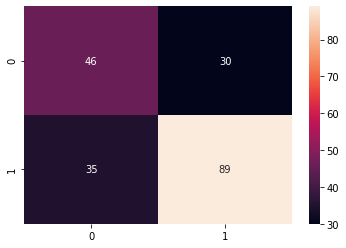

In [54]:
# Passive Aggresive Classifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

pred = pac.predict(tfidf_test)
score=accuracy_score(y_test,pred)
cf0_matrix = confusion_matrix(y_test, pred)
print(classification_report(y_test, pred))

print("Accuracy score : {}".format(accuracy_score(y_test, pred)))
print("Confusion matrix : \n {}".format(confusion_matrix(y_test, pred)))
(sns.heatmap(cf0_matrix, annot=True))

# LogisticRegression

Logistic Regression model fitted..
              precision    recall  f1-score   support

           0       0.70      0.58      0.63        76
           1       0.77      0.85      0.80       124

    accuracy                           0.74       200
   macro avg       0.73      0.71      0.72       200
weighted avg       0.74      0.74      0.74       200

Accuracy score : 0.745
Confusion matrix : 
 [[ 44  32]
 [ 19 105]]


<AxesSubplot:>

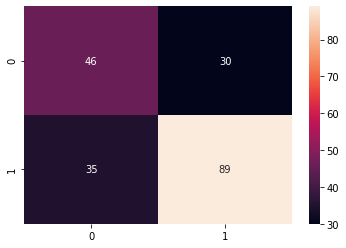

In [55]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 500)
lr.fit(tfidf_train, y_train)
print('Logistic Regression model fitted..')
cf1_matrix = confusion_matrix(y_test, pred)
pred = lr.predict(tfidf_test)
print(classification_report(y_test, pred))
print("Accuracy score : {}".format(accuracy_score(y_test, pred)))
print("Confusion matrix : \n {}".format(confusion_matrix(y_test, pred)))
(sns.heatmap(cf1_matrix, annot=True))


# XGBoost

XGBoost Classifier model fitted..
              precision    recall  f1-score   support

           0       0.63      0.64      0.64        76
           1       0.78      0.77      0.77       124

    accuracy                           0.72       200
   macro avg       0.70      0.71      0.70       200
weighted avg       0.72      0.72      0.72       200

Accuracy score : 0.72
Confusion matrix : 
 [[49 27]
 [29 95]]


<AxesSubplot:>

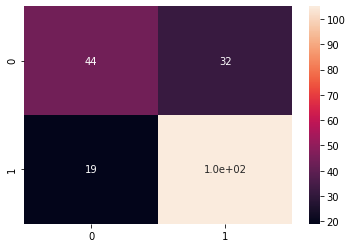

In [56]:
import xgboost
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(tfidf_train, y_train)
cf2_matrix = confusion_matrix(y_test, pred)
print('XGBoost Classifier model fitted..')
pred = xgb.predict(tfidf_test)
print(classification_report(y_test, pred))
print("Accuracy score : {}".format(accuracy_score(y_test, pred)))
print("Confusion matrix : \n {}".format(confusion_matrix(y_test, pred)))
(sns.heatmap(cf2_matrix, annot=True))

# lightgbm

LightGBM Classifier model fitted..
              precision    recall  f1-score   support

           0       0.66      0.58      0.62        76
           1       0.76      0.81      0.79       124

    accuracy                           0.73       200
   macro avg       0.71      0.70      0.70       200
weighted avg       0.72      0.72      0.72       200

Accuracy score : 0.725
Confusion matrix : 
 [[ 44  32]
 [ 23 101]]


<AxesSubplot:>

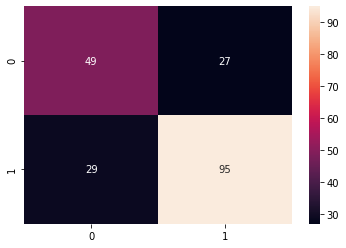

In [57]:
import lightgbm
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm.fit(tfidf_train, y_train)
cf3_matrix = confusion_matrix(y_test, pred)

print('LightGBM Classifier model fitted..')
pred = lgbm.predict(tfidf_test)
print(classification_report(y_test, pred))
print("Accuracy score : {}".format(accuracy_score(y_test, pred)))
print("Confusion matrix : \n {}".format(confusion_matrix(y_test, pred)))
(sns.heatmap(cf3_matrix, annot=True))

# Decision Tree

              precision    recall  f1-score   support

           0       0.71      0.47      0.57        76
           1       0.73      0.88      0.80       124

    accuracy                           0.73       200
   macro avg       0.72      0.68      0.68       200
weighted avg       0.72      0.72      0.71       200

Accuracy score : 0.725
Confusion matrix : 
 [[ 36  40]
 [ 15 109]]


<AxesSubplot:>

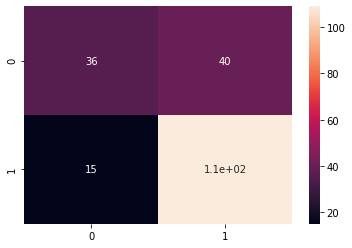

In [58]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)
# Train Decision Tree Classifer
clf = clf.fit(tfidf_train,y_train)

#Predict the response for test dataset
pred = clf.predict(tfidf_test)


cf4_matrix = confusion_matrix(y_test, pred)
print(classification_report(y_test, pred))
print("Accuracy score : {}".format(accuracy_score(y_test, pred)))
print("Confusion matrix : \n {}".format(confusion_matrix(y_test, pred)))

(sns.heatmap(cf4_matrix, annot=True))

# MultiNomial Naive Bayes

              precision    recall  f1-score   support

           0       0.72      0.38      0.50        76
           1       0.71      0.91      0.80       124

    accuracy                           0.71       200
   macro avg       0.72      0.65      0.65       200
weighted avg       0.71      0.71      0.68       200

Accuracy score : 0.71
Confusion matrix : 
 [[ 29  47]
 [ 11 113]]


<AxesSubplot:>

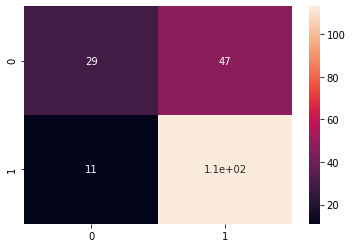

In [59]:
MNB = MultinomialNB()
MNB.fit(tfidf_train,y_train)
        
        
#pred = MNB.predict(tfidf_test)
pred = MNB.predict(tfidf_test)
        
cf5_matrix = confusion_matrix(y_test, pred)
print(classification_report(y_test, pred))
print("Accuracy score : {}".format(accuracy_score(y_test, pred)))
print("Confusion matrix : \n {}".format(confusion_matrix(y_test, pred)))

(sns.heatmap(cf5_matrix, annot=True))

# Gaussian Naive Bayes

In [62]:
GNB = GaussianNB()
#print(clf)
GNB.fit(tfidf_train,y_train)

#print(X_train, y_train)
pred = GNB.predict(tfidf_test)

#Result
cf6_matrix = confusion_matrix(y_test, pred)
print(classification_report(y_test, pred))
print("Accuracy score : {}".format(accuracy_score(y_test, pred)))
print("Confusion matrix : \n {}".format(confusion_matrix(y_test, pred)))

(sns.heatmap(cf6_matrix, annot=True))

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

# SVM

              precision    recall  f1-score   support

           0       0.63      0.66      0.65        76
           1       0.79      0.77      0.78       124

    accuracy                           0.73       200
   macro avg       0.71      0.71      0.71       200
weighted avg       0.73      0.72      0.73       200

Accuracy score : 0.725
Confusion matrix : 
 [[50 26]
 [29 95]]


<AxesSubplot:>

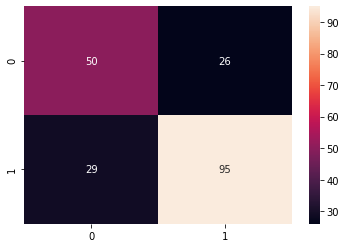

In [63]:
SVM = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
SVM.fit(tfidf_train,y_train) #X_train, y_train

#Predict the response for test dataset
pred = SVM.predict(tfidf_test) #X_test

cf7_matrix = confusion_matrix(y_test, pred)
print(classification_report(y_test, pred))
print("Accuracy score : {}".format(accuracy_score(y_test, pred)))
print("Confusion matrix : \n {}".format(confusion_matrix(y_test, pred)))

(sns.heatmap(cf7_matrix, annot=True))

# K KNeighbors

In [64]:
K = []
training = []
test = []
scores = {}
  
for k in range(2, 21):
    clf6 = KNeighborsClassifier(n_neighbors = k)
    clf6.fit(tfidf_train,y_train)
  
    training_score = clf.score(tfidf_train,y_train)
    test_score = clf.score(y_test, pred)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]
    

ValueError: Expected 2D array, got 1D array instead:
array=[1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0.
 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1.
 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

              precision    recall  f1-score   support

           0       0.63      0.66      0.65        76
           1       0.79      0.77      0.78       124

    accuracy                           0.73       200
   macro avg       0.71      0.71      0.71       200
weighted avg       0.73      0.72      0.73       200

Accuracy score : 0.725
Confusion matrix : 
 [[50 26]
 [29 95]]


<AxesSubplot:>

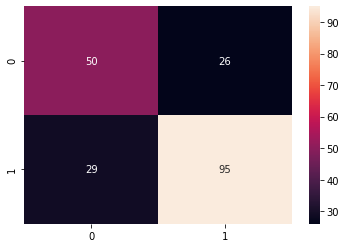

In [65]:
cf8_matrix = confusion_matrix(y_test, pred)
print(classification_report(y_test, pred))
print("Accuracy score : {}".format(accuracy_score(y_test, pred)))
print("Confusion matrix : \n {}".format(confusion_matrix(y_test, pred)))

(sns.heatmap(cf8_matrix, annot=True))

In [66]:
for keys, values in scores.items():
    print(keys, ':', values)

In [67]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
model = abc.fit(tfidf_train,y_train)

#Predict the response for test dataset
pred = model.predict(tfidf_test)


              precision    recall  f1-score   support

           0       0.55      0.55      0.55        76
           1       0.73      0.73      0.73       124

    accuracy                           0.66       200
   macro avg       0.64      0.64      0.64       200
weighted avg       0.66      0.66      0.66       200

Accuracy score : 0.66
Confusion matrix : 
 [[42 34]
 [34 90]]


<AxesSubplot:>

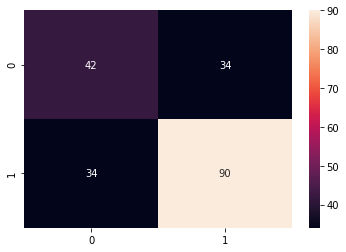

In [68]:
cf9_matrix = confusion_matrix(y_test, pred)
print(classification_report(y_test, pred))
print("Accuracy score : {}".format(accuracy_score(y_test, pred)))
print("Confusion matrix : \n {}".format(confusion_matrix(y_test, pred)))

(sns.heatmap(cf9_matrix, annot=True))

# AdaBoost using Different Base Learners

In [69]:
svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(tfidf_train,y_train)

#Predict the response for test dataset
pred = model.predict(tfidf_test)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        76
           1       0.62      1.00      0.77       124

    accuracy                           0.62       200
   macro avg       0.31      0.50      0.38       200
weighted avg       0.38      0.62      0.47       200

Accuracy score : 0.62
Confusion matrix : 
 [[  0  76]
 [  0 124]]


c:\users\goku\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\goku\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\goku\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

<AxesSubplot:>

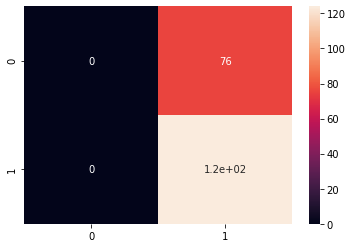

In [70]:
cf10_matrix = confusion_matrix(y_test, pred)
print(classification_report(y_test, pred))
print("Accuracy score : {}".format(accuracy_score(y_test, pred)))
print("Confusion matrix : \n {}".format(confusion_matrix(y_test, pred)))

(sns.heatmap(cf10_matrix, annot=True))

              precision    recall  f1-score   support

           0       0.71      0.47      0.57        76
           1       0.73      0.88      0.80       124

    accuracy                           0.73       200
   macro avg       0.72      0.68      0.68       200
weighted avg       0.72      0.72      0.71       200

Accuracy score : 0.725
Confusion matrix : 
 [[ 36  40]
 [ 15 109]]


<AxesSubplot:>

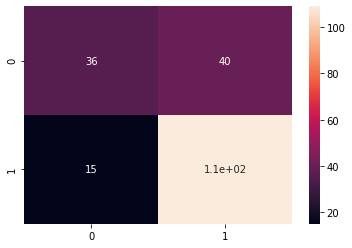

In [73]:
RFC = RandomForestClassifier(n_estimators = 200, random_state=200)
RFC.fit(tfidf_train,y_train)
pred = clf.predict(tfidf_test)

#Result
cf11_matrix = confusion_matrix(y_test, pred)
print(classification_report(y_test, pred))
print("Accuracy score : {}".format(accuracy_score(y_test, pred)))
print("Confusion matrix : \n {}".format(confusion_matrix(y_test, pred)))

(sns.heatmap(cf11_matrix, annot=True))

In [74]:
# save the model to disk
SebenarnyaContent = 'finalized_model.sav'
pickle.dump(lr, open(SebenarnyaContent, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(SebenarnyaContent, 'rb'))
result = loaded_model.score(tfidf_train, y_train)
print(result)

0.86875
